In [28]:
from utils import get_data_crypto, models


data = get_data_crypto().download_data_cloud(start_time='2025-04-26', end_time='2025-04-30', crypto="binancecoin", time='minutes')

prophet_model = models().prophet_model(data=data, time='min')

# df = data[['close_time', 'close']].rename(columns={'close_time': 'ds', 'close': 'y'})

# model = Prophet(daily_seasonality=True)
# model.fit(df)
 
# future = model.make_future_dataframe(periods=24*60, freq='min') 

# forecast = model.predict(future)

# fig1 = model.plot(forecast)
# plt.title('Predicción de precio para las próximas 24 horas')
# plt.xlabel('Fecha')
# plt.ylabel('Precio de cierre')
# plt.show()



ImportError: cannot import name 'models' from 'utils' (/workspaces/FinalHeimdall/utils.py)

14:34:04 - cmdstanpy - INFO - Chain [1] start processing
14:34:04 - cmdstanpy - INFO - Chain [1] done processing


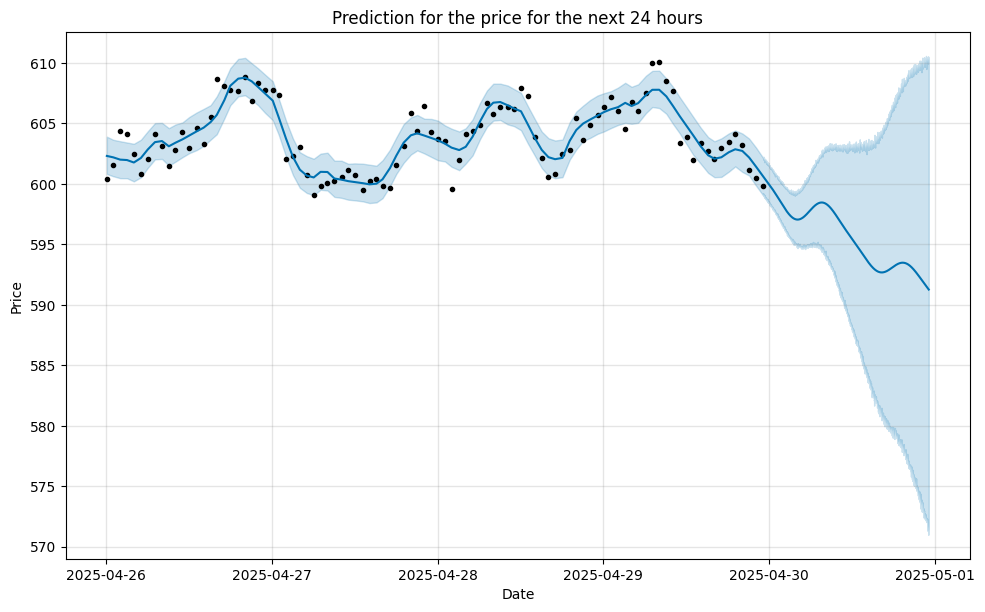

In [26]:
from prophet import Prophet

class models:
    def prophet_model(data, time):
        if len(data.columns) > 2:
            raise ValueError('Your dataset has more than two columns {data.columns}')
        data.columns = ['ds','y']

        model = Prophet(daily_seasonality=True)
        model.fit(data)

        future = model.make_future_dataframe(periods=24*60, freq = time)

        predict = model.predict(future)

        fig1 = model.plot(predict)
        plt.title('Prediction for the price for the next 24 hours')
        plt.ylabel('Price')
        plt.xlabel('Date')
        plt.show()

        return predict



x = models.prophet_model(data=data, time = 'min')



In [45]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Descargar datos
data = donwload_data(start_time='2025-03-01 00:00:00', end_time='2025-04-28 00:00:00', crypto="BNBUSDT", time='seconds')
df = data[['close_time', 'close']].rename(columns={'close_time': 'ds', 'close': 'y'})
print('*'*50, ' DATA DOWNLOADED ', '*'*50)

# 2. Crear características de tiempo
df['hour'] = df['ds'].dt.hour
df['minute'] = df['ds'].dt.minute
df['second'] = df['ds'].dt.second
df['dayofweek'] = df['ds'].dt.dayofweek
df['day'] = df['ds'].dt.day

X = df[['hour', 'minute', 'second', 'dayofweek', 'day']]
y = df['y']

# 3. Entrenar el modelo
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X, y)

# 4. Crear las próximas 24 horas en segundos
future_dates = pd.date_range(start=df['ds'].max() + pd.Timedelta(seconds=1), periods=24*60*60, freq='S')

future_df = pd.DataFrame({'ds': future_dates})

# 5. Crear características de tiempo para el futuro
future_df['hour'] = future_df['ds'].dt.hour
future_df['minute'] = future_df['ds'].dt.minute
future_df['second'] = future_df['ds'].dt.second
future_df['dayofweek'] = future_df['ds'].dt.dayofweek
future_df['day'] = future_df['ds'].dt.day

X_future = future_df[['hour', 'minute', 'second', 'dayofweek', 'day']]

# 6. Predecir el futuro
future_preds = model.predict(X_future)




**************************************************  DATA DOWNLOADED  **************************************************


C:\Users\santi\AppData\Local\Temp\ipykernel_21132\789351349.py:28: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  future_dates = pd.date_range(start=df['ds'].max() + pd.Timedelta(seconds=1), periods=24*60*60, freq='S')


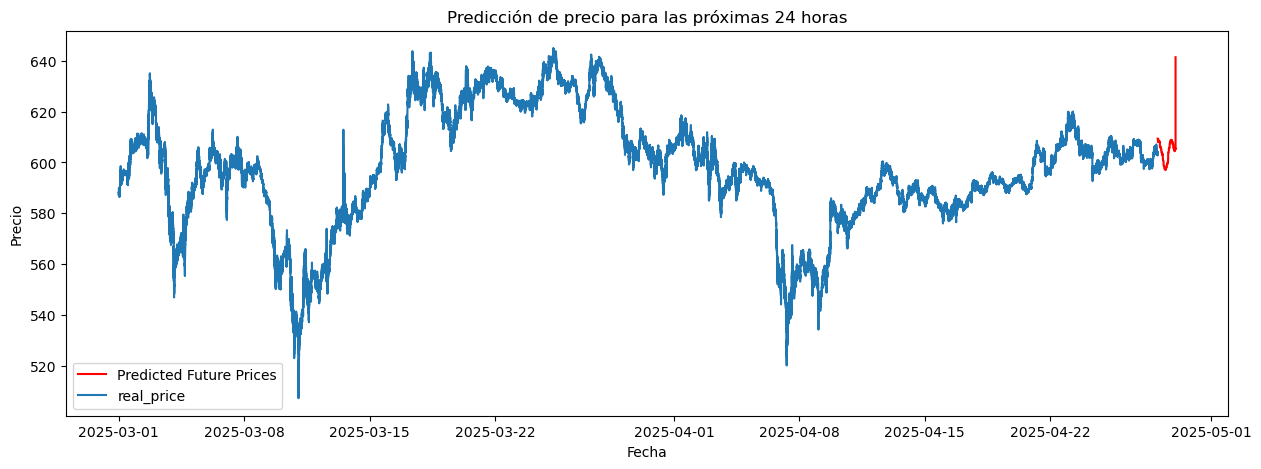

In [46]:
plt.figure(figsize=(15,5))
plt.plot(future_df['ds'], future_preds, label='Predicted Future Prices', color='r')
plt.plot(df['ds'], df['y'], label = 'real_price')
plt.title('Predicción de precio para las próximas 24 horas')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [48]:
predicted_prices = future_df.copy()
predicted_prices['Predicted Price'] = future_preds



In [50]:
predicted_prices[predicted_prices['ds']=='2025-04-28 07:10:00.999']

,ds,hour,minute,second,dayofweek,day,Predicted Price
25799,2025-04-28 07:10:00.999,7,10,0,0,28,600.878235


In [51]:
predicted_prices

,ds,hour,minute,second,dayofweek,day,Predicted Price
0,2025-04-28 00:00:01.999,0,0,1,0,28,609.364990
1,2025-04-28 00:00:02.999,0,0,2,0,28,609.364990
2,2025-04-28 00:00:03.999,0,0,3,0,28,609.364990
3,2025-04-28 00:00:04.999,0,0,4,0,28,609.364990
4,2025-04-28 00:00:05.999,0,0,5,0,28,609.364990
...,...,...,...,...,...,...,...
86395,2025-04-28 23:59:56.999,23,59,56,0,28,605.250305
86396,2025-04-28 23:59:57.999,23,59,57,0,28,605.250305
86397,2025-04-28 23:59:58.999,23,59,58,0,28,605.250305
86398,2025-04-28 23:59:59.999,23,59,59,0,28,605.250305
